In [2]:
from pylibCZIrw import czi as pyczi
from pylibCZIrw.czi import ReaderFileInputTypes, CacheOptions, CacheType
import json
import timeit
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os, sys
from tqdm import tqdm
from tqdm.contrib import itertools as it
from matplotlib.patches import Rectangle
from IPython.display import display, JSON

In [3]:
czifile = r'R:\FIVE\EXP\FIV942\Kath 01\Bbs8 KO adipo FI-01.czi'

In [4]:
# open the CZI for reading using a context manager (preferred way to do it)
with pyczi.open_czi(czifile) as czidoc:
    # get the raw metadata as XML
    md_xml = czidoc.raw_metadata
    print(md_xml[:1000])

<?xml version="1.0"?>
<ImageDocument>
 <Metadata>
  <Experiment Version="1.1">
   <RunMode>OptimizeBeforePerformEnabled,ValidateAndAdaptBeforePerformEnabled,TimeStitchLoopedBlockEnabled</RunMode>
   <BeforeHardwareSetting>Before Exp [DAPI, BPR6g, Bright] Smart</BeforeHardwareSetting>
   <AfterHardwareSetting>After Exp [DAPI, BPR6g, Bright] Smart</AfterHardwareSetting>
   <ExperimentBlockIndex>0</ExperimentBlockIndex>
   <IsSegmented>false</IsSegmented>
   <IsStandardMode>true</IsStandardMode>
   <ImageTransferMode>MemoryMappedAndFileStream</ImageTransferMode>
   <AutoSave IsActivated="true" EnableSingleFileSave="false">
    <StorageFolder>D:\MCF_User\AG_Wachten\Katharina</StorageFolder>
    <Name>Bbs8 KO adipo FI</Name>
    <IsAutoSubFolder>true</IsAutoSubFolder>
    <IsAutoSubFolderExternal>true</IsAutoSubFolderExternal>
    <IsClosedOnCompletion>false</IsClosedOnCompletion>
    <SingleFileSaveFormat>JPG</SingleFileSaveFormat>
    <ConvertTo8Bit>false</ConvertTo8Bit>
    <AddXmlMetada

Apparently The **`total_bounding_box`** gives us all the dimensions of all **orthogonal planes** of the CZI image file. Idk exactly what orthogonal planes means

In [5]:
with pyczi.open_czi(czifile) as czidoc:
    # get the image dimensions as an dictionary, where the key identifies the dimension
    total_bounding_box = czidoc.total_bounding_box

print(total_bounding_box)

{'T': (0, 1), 'Z': (0, 7), 'C': (0, 3), 'X': (26768, 32724), 'Y': (15615, 72168)}


In [6]:
with pyczi.open_czi(czifile) as czidoc:
    # get the total bounding box for all scenes
    total_bounding_rectangle = czidoc.total_bounding_rectangle

print(total_bounding_rectangle)

Rectangle(x=26768, y=15615, w=5956, h=56553)


There are these things called scenes too. Idk what they are exactly either. It seems like the images contained in the .czi file cuz there are 48 of them and there were 48 images I extracted from the file with Fiji.

In [7]:
with pyczi.open_czi(czifile) as czidoc:
    # get the bounding boxes for each individual scene
    scenes_bounding_rectangle = czidoc.scenes_bounding_rectangle

print(scenes_bounding_rectangle)

{0: Rectangle(x=26804, y=15615, w=980, h=708), 1: Rectangle(x=26804, y=17128, w=980, h=708), 2: Rectangle(x=31744, y=15619, w=980, h=708), 3: Rectangle(x=31744, y=17131, w=980, h=708), 4: Rectangle(x=26800, y=20554, w=980, h=708), 5: Rectangle(x=26800, y=22067, w=980, h=708), 6: Rectangle(x=31741, y=20558, w=980, h=708), 7: Rectangle(x=31741, y=22070, w=980, h=708), 8: Rectangle(x=26797, y=25493, w=980, h=708), 9: Rectangle(x=26797, y=27006, w=980, h=708), 10: Rectangle(x=31738, y=25497, w=980, h=708), 11: Rectangle(x=31738, y=27009, w=980, h=708), 12: Rectangle(x=26794, y=30432, w=980, h=708), 13: Rectangle(x=26794, y=31945, w=980, h=708), 14: Rectangle(x=31735, y=30436, w=980, h=708), 15: Rectangle(x=31735, y=31948, w=980, h=708), 16: Rectangle(x=26791, y=35371, w=980, h=708), 17: Rectangle(x=26791, y=36884, w=980, h=708), 18: Rectangle(x=31731, y=35374, w=980, h=708), 19: Rectangle(x=31731, y=36887, w=980, h=708), 20: Rectangle(x=26788, y=40310, w=980, h=708), 21: Rectangle(x=26788,

Array Shape:  (56553, 5956, 1)


Text(0.5, 1.0, 'Frame_2')

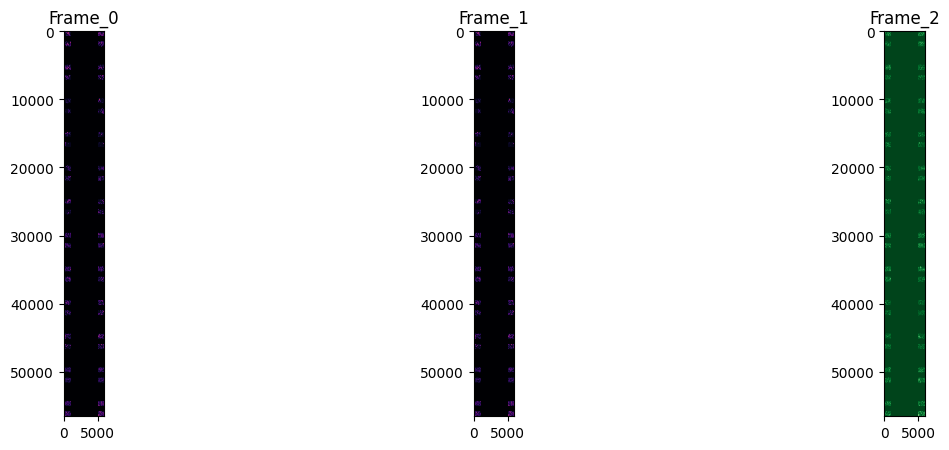

In [8]:
with pyczi.open_czi(czifile) as czidoc:
    # define some plane coordinates
    plane_1 = {'C': 0, 'Z': 2, 'T': 1}
    plane_2 = {'C': 1, 'Z': 3, 'T': 2}

    # equivalent to reading {'C': 0, 'Z': 0, 'T': 0}
    frame_0 = czidoc.read()

    # get the shape of the 2d plane - the last dime indicates the pixel type
    # 3 = BGR and 1 = Gray
    print("Array Shape: ", frame_0.shape)

    # get specific planes 
    frame_1 = czidoc.read(plane=plane_1)
    frame_2 = czidoc.read(plane=plane_2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(frame_0[..., 0], cmap=cm.inferno)
ax[0].set_title("Frame_0")
ax[1].imshow(frame_1[..., 0], cmap=cm.inferno)
ax[1].set_title("Frame_1")
ax[2].imshow(frame_2[..., 0], cmap=cm.Greens_r)
ax[2].set_title("Frame_2")

Text(0.5, 1.0, 'ch1')

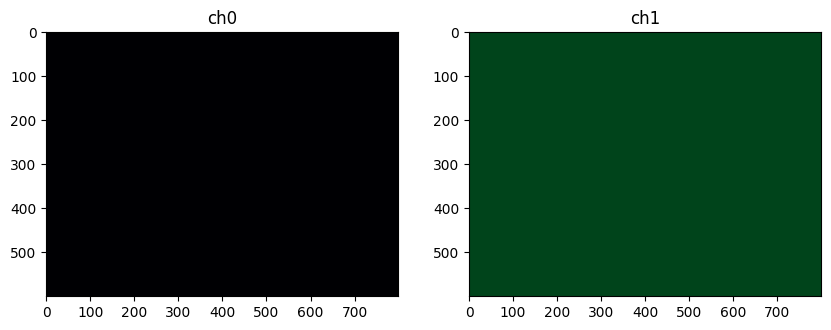

In [9]:
# define the ROI using upper left, widht and height as coordinates
my_roi = (200, 400, 800, 600)

with pyczi.open_czi(czifile) as czidoc:
    ch0 = czidoc.read(roi=my_roi, plane={'C': 0})
    ch1 = czidoc.read(roi=my_roi, plane={'C': 1})

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ch0[..., 0], cmap=cm.inferno, vmin=100, vmax=4000)
ax[0].set_title("ch0")
ax[1].imshow(ch1[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
ax[1].set_title("ch1")

Ok this is really cool. So we want to get the data for each scene. Idk what is happening here though. Why do the images look like this all of a sudden?

code from https://colab.research.google.com/github/zeiss-microscopy/OAD/blob/master/jupyter_notebooks/pylibCZIrw/pylibCZIrw_4_1_0.ipynb

Text(0.5, 1.0, 'scene:1 ch:0')

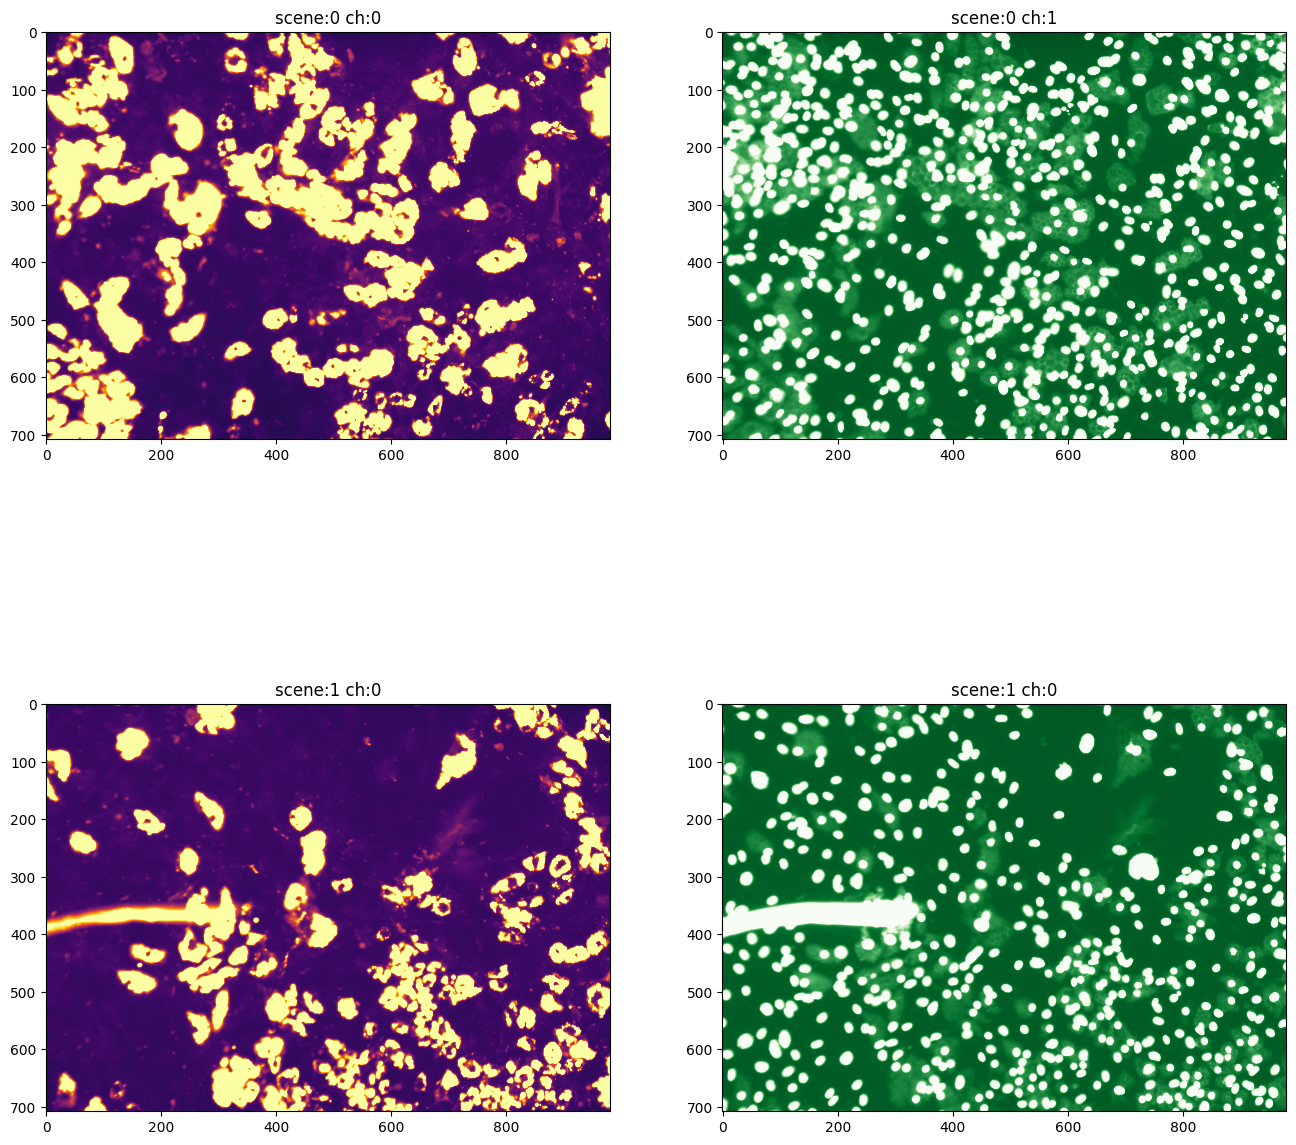

In [10]:
with pyczi.open_czi(czifile) as czidoc:
    # read a 2D image from a specific channel and scene
    c0_s0 = czidoc.read(plane={'C': 0}, scene=0)
    c1_s0 = czidoc.read(plane={'C': 1}, scene=0)
    c0_s1 = czidoc.read(plane={'C': 0}, scene=1)
    c1_s1 = czidoc.read(plane={'C': 1}, scene=1)

fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0, 0].imshow(c0_s0[..., 0], cmap=cm.inferno, vmin=100, vmax=4000)
ax[0, 0].set_title("scene:0 ch:0")
ax[0, 1].imshow(c1_s0[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
ax[0, 1].set_title("scene:0 ch:1")
ax[1, 0].imshow(c0_s1[..., 0], cmap=cm.inferno, vmin=100, vmax=4000)
ax[1, 0].set_title("scene:1 ch:0")
ax[1, 1].imshow(c1_s1[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
ax[1, 1].set_title("scene:1 ch:0")

modifying the code to see what I can do with it

Text(0.5, 1.0, 'scene:0 ch:0')

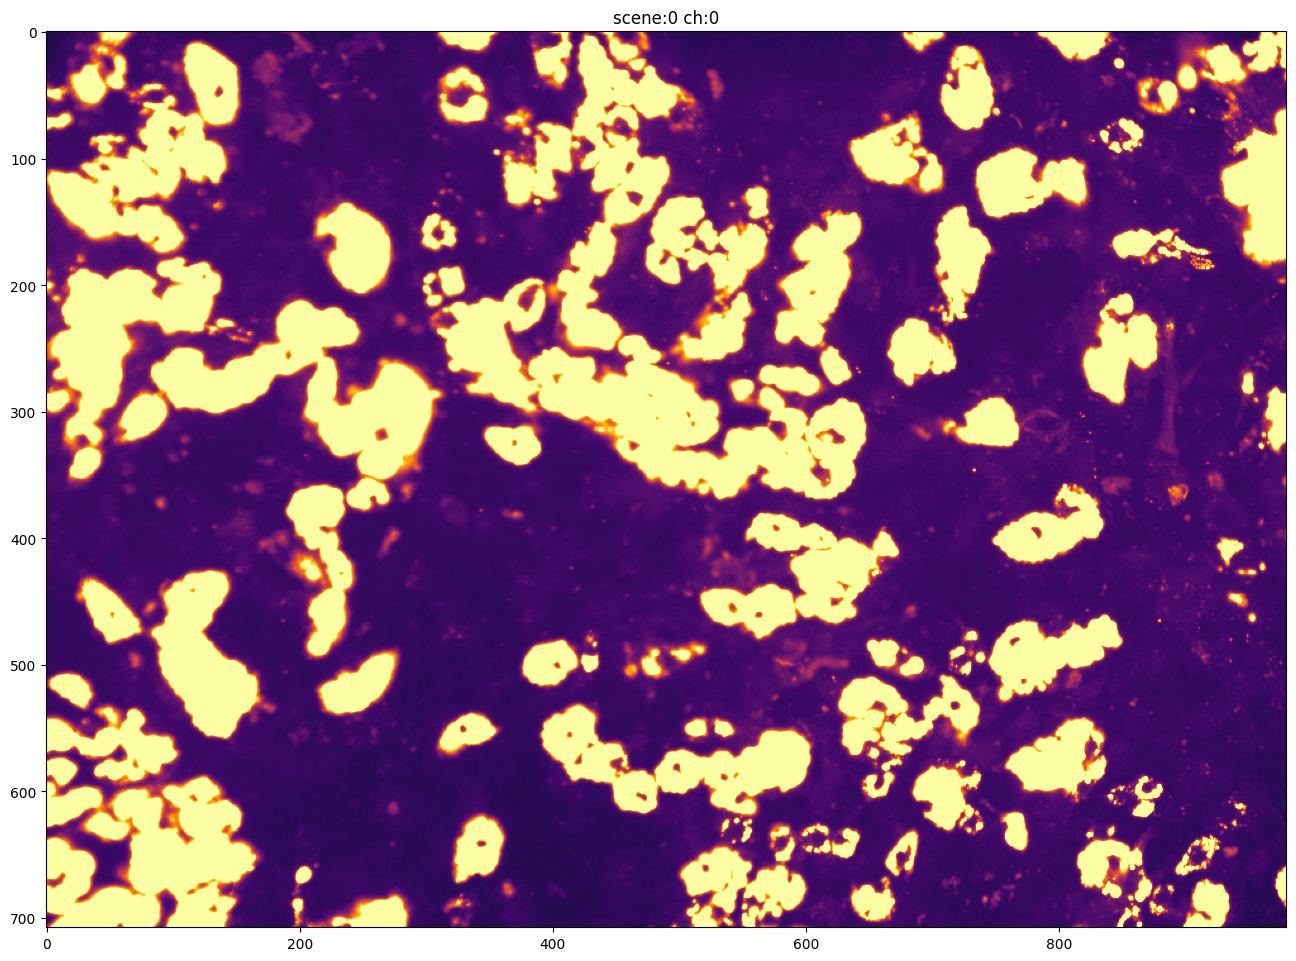

In [11]:
with pyczi.open_czi(czifile) as czidoc:
    # read a 2D image from a specific channel and scene
    c0_s0 = czidoc.read(plane={'C': 0}, scene=0)
    # c1_s0 = czidoc.read(plane={'C': 1}, scene=0)
    # c0_s1 = czidoc.read(plane={'C': 0}, scene=9)
    # c1_s1 = czidoc.read(plane={'Z': 6}, scene=47)

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.imshow(c0_s0[..., 0], cmap=cm.inferno, vmin=100, vmax=4000)
ax.set_title("scene:0 ch:0")
# ax[0, 1].imshow(c1_s0[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
# ax[0, 1].set_title("scene:0 ch:1")
# ax[1, 0].imshow(c0_s1[..., 0], cmap=cm.inferno, vmin=100, vmax=4000)
# ax[1, 0].set_title("scene:1 ch:0")
# ax[1, 1].imshow(c1_s1[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
# ax[1, 1].set_title("scene:1 ch:1")

In [12]:
with pyczi.open_czi(czifile) as czidoc:    
    c1_s1 = czidoc.read(plane={'C': 2}, scene=47)

Text(0.5, 1.0, 'scene:2 ch:1')

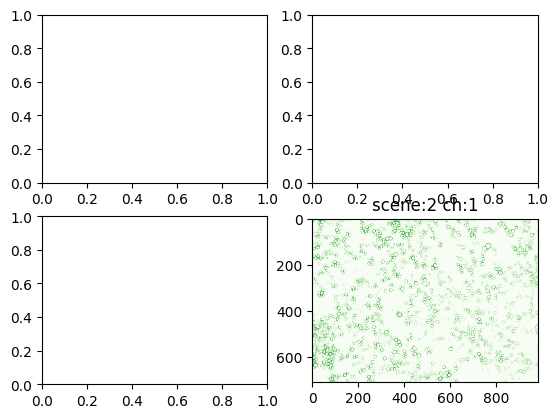

In [13]:
fig, ax = plt.subplots(2,2)
ax[1, 1].imshow(c1_s1[..., 0], cmap=cm.Greens_r, vmin=100, vmax=4000)
ax[1, 1].set_title("scene:2 ch:1")

In [14]:
type(c0_s0)

numpy.ndarray

In [17]:
c0_s0.shape

(708, 980, 1)

In [18]:
c0_s0[...,0]

array([[ 667,  603,  632, ..., 9767, 9176, 7562],
       [ 640,  675,  626, ..., 8785, 7938, 6864],
       [ 594,  595,  643, ..., 8156, 7645, 6407],
       ...,
       [1032, 1350, 1703, ...,  683,  727,  693],
       [1378, 1685, 2096, ...,  567,  588,  665],
       [1789, 2083, 2671, ...,  610,  615,  651]], dtype=uint16)

In [19]:
c0_s0

array([[[ 667],
        [ 603],
        [ 632],
        ...,
        [9767],
        [9176],
        [7562]],

       [[ 640],
        [ 675],
        [ 626],
        ...,
        [8785],
        [7938],
        [6864]],

       [[ 594],
        [ 595],
        [ 643],
        ...,
        [8156],
        [7645],
        [6407]],

       ...,

       [[1032],
        [1350],
        [1703],
        ...,
        [ 683],
        [ 727],
        [ 693]],

       [[1378],
        [1685],
        [2096],
        ...,
        [ 567],
        [ 588],
        [ 665]],

       [[1789],
        [2083],
        [2671],
        ...,
        [ 610],
        [ 615],
        [ 651]]], dtype=uint16)

In [16]:
from skimage.filters import gaussian


# define a generic 2D processing function - could by a DL segmentation as well
def process2d(image2d: np.ndarray, **kwargs: int) -> np.ndarray:
    # insert or modify the desired processing function here
    image2d = gaussian(
        image2d, sigma=kwargs["sigma"],
        preserve_range=True,
        mode='nearest'
    ).astype(image2d.dtype)

    return image2d

In [2]:
i = 1  # or any other value you want to use
file_path = rf"S:\Phys\FIV942 Adipo\Datasets\02h5\UNet 00029 Ep480 images_infer 1\results{i}.txt"
print(file_path)

S:\Phys\FIV942 Adipo\Datasets\02h5\UNet 00029 Ep480 images_infer 1\results1.txt
